<a href="https://colab.research.google.com/github/bpbista/Deep-Learning-with-PyTorch/blob/MNIST_Network/MNIST_Network_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x5827e000 @  0x7f5dc93f72a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
import torch
import numpy as np


In [0]:
from torchvision import datasets
import torchvision.transforms as transforms

In [6]:
num_workers = 0
batch_size = 20
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data',train=True,download=True,transform=transform)
test_data = datasets.MNIST(root='data',train=False,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers=num_workers)


Processing...
Done!


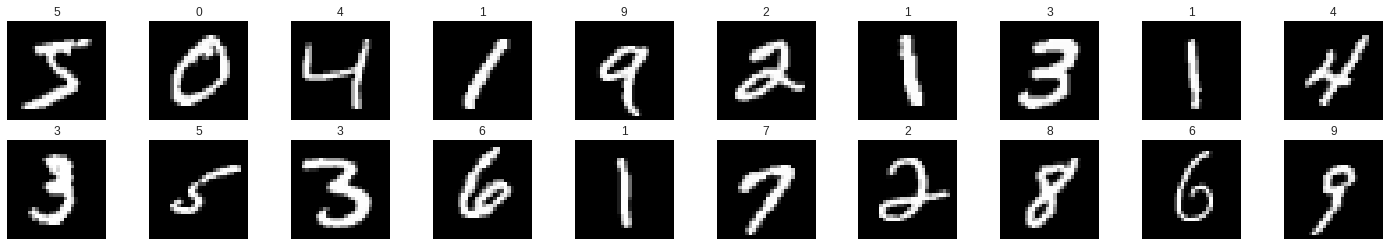

In [7]:
import matplotlib.pyplot as plot
%matplotlib inline

data_iterator = iter(train_loader)
images,labels = data_iterator.next()
images = images.numpy()

figure = plot.figure(figsize=(25,4))

for index in np.arange(20):
  ax = figure.add_subplot(2,20/2, index+1, xticks=[],yticks=[])
  ax.imshow(np.squeeze(images[index]),cmap='gray')
  ax.set_title(str(labels[index].item()))


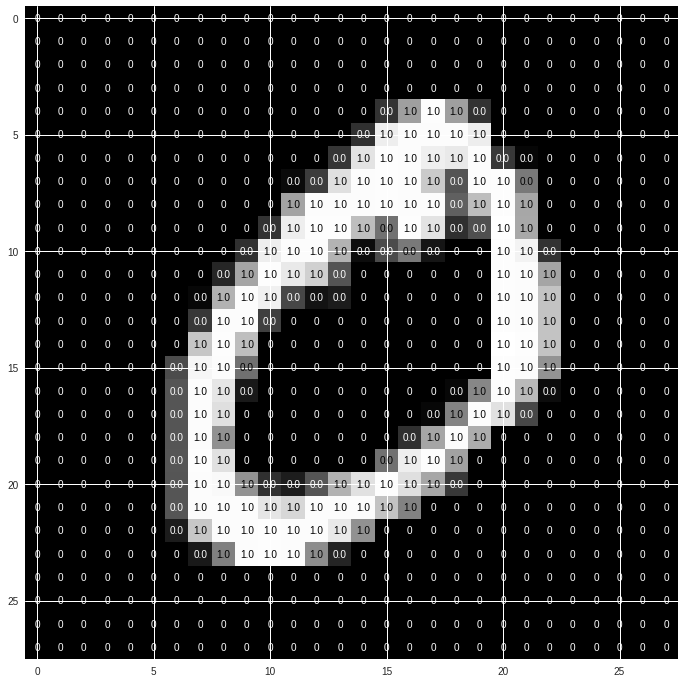

In [8]:
image = np.squeeze(images[1])
figure = plot.figure(figsize = (12,12))
ax = figure.add_subplot(111)
ax.imshow(image,cmap='gray')
width,height = image.shape
thresh = image.max()/2.5
  
for x in range(width):
  for y in range(height):
    value = round(image[x][y] if image[x][y] != 0 else 0)
    ax.annotate(str(value),xy=(y,x),horizontalalignment = 'center',verticalalignment = 'center',color = 'white' if image[x,y]<thresh else 'black')
      

In [0]:
import torch.nn as nn
import torch.nn.functional as fun

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    hidden_1 = 512
    hidden_2 = 512
    self.fcl = nn.Linear(28*28,hidden_1)
    self.fc2 = nn.Linear(hidden_1,hidden_2)
    self.fc3 = nn.Linear(hidden_2,10)
    self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    x = x.view(-1,28*28)
    x = fun.relu(self.fcl(x))
    x = self.dropout(x) 
    x = fun.relu(self.fc2(x))
    x = self.dropout(x) 
    x = fun.relu(self.fc3(x))
    return x

In [10]:
model = Net()
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

Net(
  (fcl): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [18]:
  epochs = 21
  model.train()
  
  for epoch in range(epochs):
    train_loss = 0.0
    
    for data,target in train_loader:
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output,target)
      loss.backward()
      optimizer.step()
      train_loss += loss.item()*data.size(0)
      
    train_loss = train_loss/len(train_loader.dataset)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 1 	Training Loss: 0.001246
Epoch: 2 	Training Loss: 0.001672
Epoch: 3 	Training Loss: 0.001295
Epoch: 4 	Training Loss: 0.001753
Epoch: 5 	Training Loss: 0.001305
Epoch: 6 	Training Loss: 0.001246
Epoch: 7 	Training Loss: 0.001460
Epoch: 8 	Training Loss: 0.001280
Epoch: 9 	Training Loss: 0.001164
Epoch: 10 	Training Loss: 0.001336
Epoch: 11 	Training Loss: 0.001631
Epoch: 12 	Training Loss: 0.001027
Epoch: 13 	Training Loss: 0.001219
Epoch: 14 	Training Loss: 0.001188
Epoch: 15 	Training Loss: 0.001077
Epoch: 16 	Training Loss: 0.001240
Epoch: 17 	Training Loss: 0.001545
Epoch: 18 	Training Loss: 0.001022
Epoch: 19 	Training Loss: 0.001018
Epoch: 20 	Training Loss: 0.000933
Epoch: 21 	Training Loss: 0.001035


In [19]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.074871

Test Accuracy of     0: 99% (975/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 98% (1016/1032)
Test Accuracy of     3: 98% (997/1010)
Test Accuracy of     4: 98% (968/982)
Test Accuracy of     5: 98% (878/892)
Test Accuracy of     6: 98% (944/958)
Test Accuracy of     7: 97% (1002/1028)
Test Accuracy of     8: 97% (945/974)
Test Accuracy of     9: 97% (986/1009)

Test Accuracy (Overall): 98% (9838/10000)


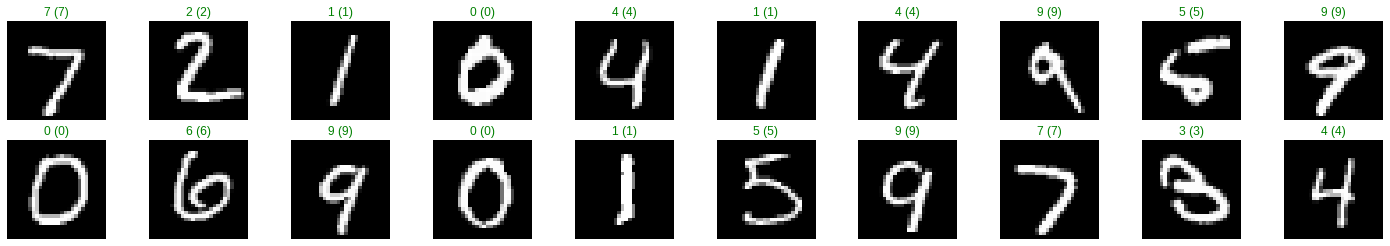

In [20]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plot.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))